In [10]:
import pandas as pd
import re
from unidecode import unidecode
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm 
from matplotlib import pyplot as plt

import random

random.seed(47)

In [11]:
df_train = pd.read_csv("../train.csv", encoding="UTF8")

## Normalize 

In [12]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    text = unidecode(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r'\d+', '', text)
    return text

In [13]:
df_train["text"] = df_train["text"].apply(normalize_text)

## Vetorizacao

In [14]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train["text"]).toarray()
# X_test = vectorizer.fit_transform(df_test["text"])
y = df_train["target"].to_numpy()

## K-Fold

In [15]:
from sklearn.model_selection import KFold

accuracies = list()

for j in range(2,20):
    kf = KFold(n_splits=j)
    n = kf.get_n_splits(X)
    accuracy = 0
    
    print(f"Numero de etapas: {n}")
    for i, (train_index, test_index) in tqdm(enumerate(kf.split(X))):
        nb = GaussianNB()
        nb.fit(X[train_index], y[train_index])
        accuracy += accuracy_score(y[test_index], nb.predict(X[test_index]))

    accuracies.append((accuracy/n,j))

Numero de etapas: 2


2it [00:05,  2.67s/it]


Numero de etapas: 3


3it [00:06,  2.17s/it]


Numero de etapas: 4


4it [00:08,  2.16s/it]


Numero de etapas: 5


5it [00:10,  2.08s/it]


Numero de etapas: 6


6it [00:12,  2.12s/it]


Numero de etapas: 7


7it [00:14,  2.03s/it]


Numero de etapas: 8


8it [00:16,  2.00s/it]


Numero de etapas: 9


9it [00:17,  1.98s/it]


Numero de etapas: 10


10it [00:19,  1.98s/it]


Numero de etapas: 11


11it [00:21,  1.99s/it]


Numero de etapas: 12


12it [00:23,  1.97s/it]


Numero de etapas: 13


13it [00:27,  2.10s/it]


Numero de etapas: 14


14it [00:28,  2.01s/it]


Numero de etapas: 15


15it [00:30,  2.03s/it]


Numero de etapas: 16


16it [00:32,  2.05s/it]


Numero de etapas: 17


17it [00:34,  2.06s/it]


Numero de etapas: 18


18it [00:36,  2.04s/it]


Numero de etapas: 19


19it [00:37,  2.00s/it]


In [17]:
accuracies

[(0.5972686870895374, 2),
 (0.5874185770067151, 3),
 (0.59109731648834, 4),
 (0.5925425559726765, 5),
 (0.5933314150672139, 6),
 (0.588077175442394, 7),
 (0.5889993615742827, 8),
 (0.5966141474052004, 9),
 (0.5916255376093756, 10),
 (0.5843951109321577, 11),
 (0.5943853134288813, 12),
 (0.5901874328232952, 13),
 (0.5882070024142253, 14),
 (0.5950493614333712, 15),
 (0.590579666076957, 16),
 (0.5938645592465175, 17),
 (0.5938595901538322, 18),
 (0.5907192544953406, 19)]

In [21]:
accuracies_true = [i[0] for i in accuracies]
ks = [i[1] for i in accuracies]

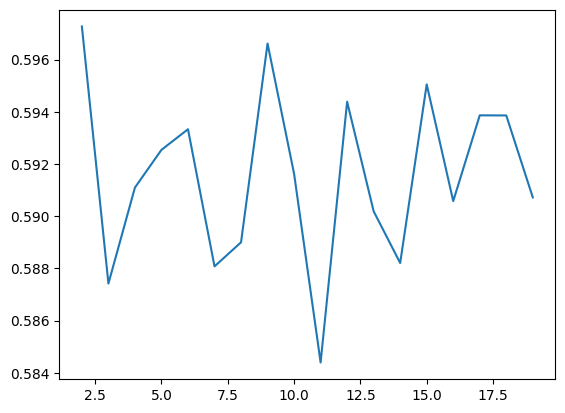

In [22]:

plt.plot(ks, accuracies_true)
plt.show()